In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
filename = '../../data/NASA Near-Earth Objects-CleanbyThang.csv'
df = pd.read_csv(filename)

In [22]:
# chuyển đổi các biến phân loại thành dạng category
df['orbit_class_type'] = df['orbit_class_type'].astype('category')
#chuyển ngày thành dạng datetime
df['first_observation_date'] = pd.to_datetime(df['first_observation_date'])
df['last_observation_date'] = pd.to_datetime(df['last_observation_date'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id                                 23999 non-null  int64         
 1   absolute_magnitude_h               23999 non-null  float64       
 2   is_potentially_hazardous_asteroid  23999 non-null  bool          
 3   is_sentry_object                   23999 non-null  bool          
 4   kilometers_estimated_diameter_min  23999 non-null  float64       
 5   kilometers_estimated_diameter_max  23999 non-null  float64       
 6   orbit_class_type                   23999 non-null  category      
 7   perihelion_distance                23999 non-null  float64       
 8   aphelion_distance                  23999 non-null  float64       
 9   first_observation_date             23999 non-null  datetime64[ns]
 10  last_observation_date             

# biểu diễn các biến phân loại

# biến orbit_class_type

In [24]:
# biến orbit class type 
print(df['orbit_class_type'].value_counts()) 

orbit_class_type
APO    13244
AMO     8921
ATE     1812
IEO       22
Name: count, dtype: int64


<Axes: xlabel='orbit_class_type', ylabel='count'>

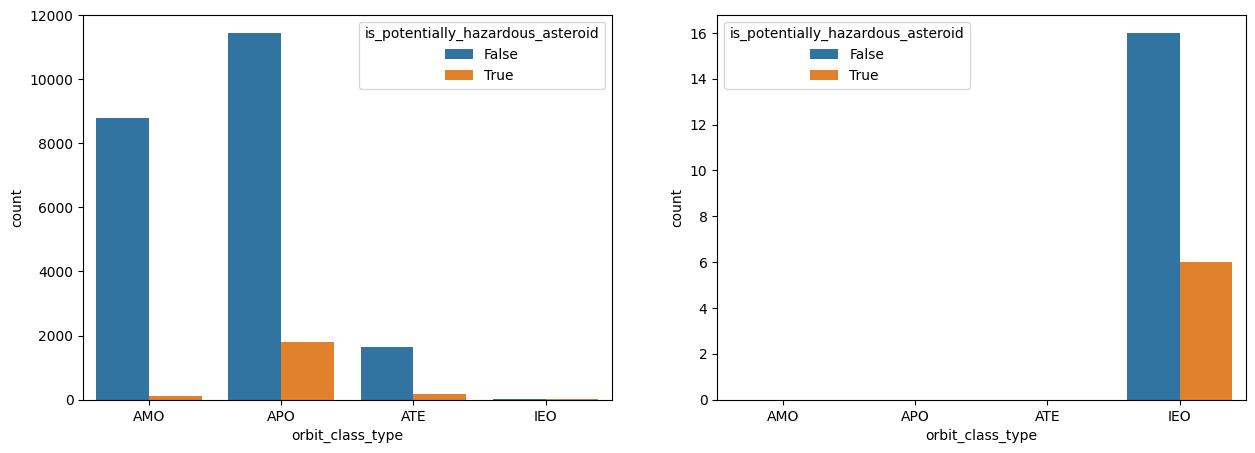

In [42]:
# vẽ biểu đồ cột cho biến orbit class type


plt.subplots(ncols=2,figsize=(15, 5))
plt.subplot(1, 2,1)
sns.countplot(x='orbit_class_type', data=df,hue='is_potentially_hazardous_asteroid')

plt.subplot(1, 2,2)
sns.countplot(data =df[df['orbit_class_type']=='IEO' ], x='orbit_class_type',hue='is_potentially_hazardous_asteroid')





# biến is_sentry_object
  

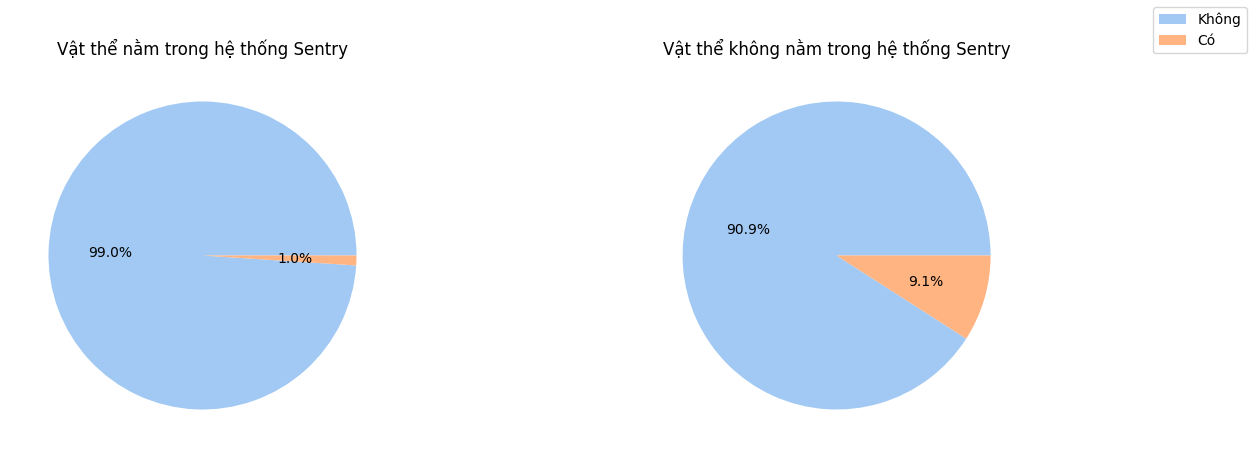

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette("pastel")

fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# các vật thể nằm trong hệ thống Sentry
df1 = df[df['is_sentry_object'] == True]
axs[0].pie(df1['is_potentially_hazardous_asteroid'].value_counts(), autopct='%1.1f%%', colors=color)
axs[0].set_title('Vật thể nằm trong hệ thống Sentry')

# các vật thể không nằm trong hệ thống Sentry
df2 = df[df['is_sentry_object'] == False]
axs[1].pie(df2['is_potentially_hazardous_asteroid'].value_counts(), autopct='%1.1f%%', colors=color)
axs[1].set_title('Vật thể không nằm trong hệ thống Sentry')


fig.legend(['Không', 'Có'], loc='upper right')

plt.show()


 đánh giá biến orbit class type:
- tỉ lệ là vật thể nguy hiểm trong mỗi loại quỹ đạo là khác nhau, đối với loại IEO tỉ lệ vật thể nguy hiểm cao hơn so với các loại khác
- loại quỹ đạo AMO có tỉ lệ vật thể nguy hiểm thấp nhất
=> biến orbit class type ảnh hưởng đến biến is_potentially_hazardous_asteroid

đánh giá biến is Sentry Object: 
- đối với các vật thể không nằm trong hệ theo dõi sentry thì có 9,1% là vật thể nguy hiểm 
- đỏi với các vật thể nằm trong hệ theo dõi sentry thì có 1% là vật thể nguy hiểm 

In [22]:
numeric_col = ['absolute_magnitude_h','is_potentially_hazardous_asteroid']

In [23]:
numeric_col = df.select_dtypes(include=['float64', 'int64']).columns
numeric_col =df[numeric_col].drop('id', axis=1).select_dtypes(include=['float64', 'int64']).columns
df[numeric_col].describe()

,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance,first_observation_year,last_observation_year
count,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000
mean,22.942724,0.167774,0.375154,0.915227,2.653150,57.866911,27.190633
std,2.952519,0.292968,0.655097,0.232206,4.468320,7.938506,4.837431
min,12.580000,0.000609,0.001362,0.070431,0.653754,0.000000,0.000000
25%,20.655000,0.024241,0.054205,0.785140,1.706371,54.000000,25.000000
50%,23.200000,0.060891,0.136157,0.965340,2.480121,60.000000,29.000000
75%,25.200000,0.197040,0.440595,1.068988,3.398020,64.000000,31.000000
max,33.200000,8.101305,18.115068,1.299988,631.895456,66.000000,33.000000


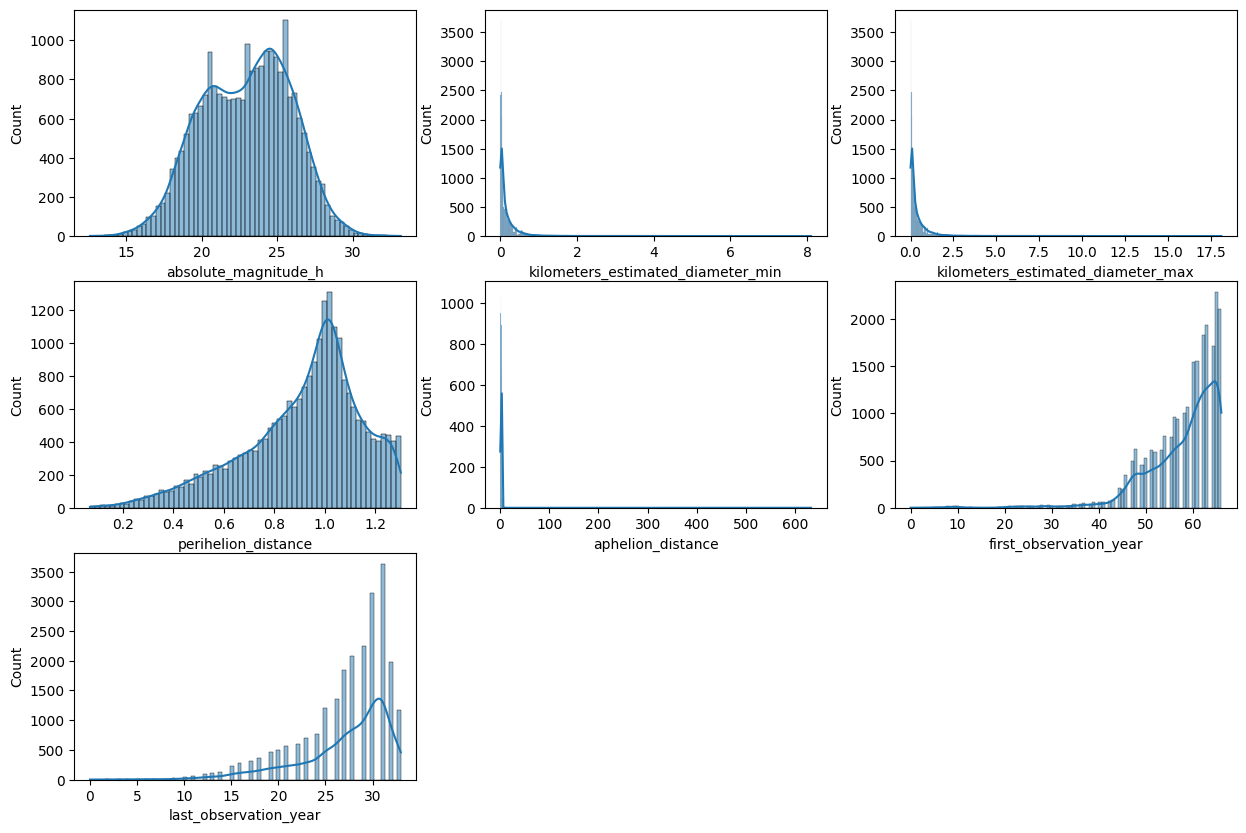

In [24]:
# vẽ đồ thị biểu diễn phân bố của các biến số
Figure, Axes = plt.subplots(ncols=3,nrows=3 ,figsize=(15, 10))

for idx, col in enumerate(numeric_col):
    sns.histplot(data=df, x=col, kde=True, ax=Axes[idx//3, idx%3])
# disable the empty subplot
for idx in range(len(numeric_col), 9):
    Axes[idx//3, idx%3].axis('off')
plt.show()


1. absolute_magnitude_h
- Phân tích: Phân bố khá đối xứng với đỉnh cao nhất nằm trong khoảng từ 22 đến 25. Có một số giá trị nằm ngoài biên độ nhưng không quá nhiều, cho thấy đây là một phân phối tương đối chuẩn.
- Ý nghĩa: Biến này đại diện cho độ sáng tuyệt đối của các NEO (Near Earth Objects). Phần lớn NEO có độ sáng nằm trong phạm vi phổ biến (22–25), một số ít rất sáng hoặc rất mờ.
2. kilometers_estimated_diameter_min
- Phân tích: Phân phối lệch về bên trái (skewed right), với hầu hết các giá trị rất nhỏ (gần 0). Rất ít đối tượng có đường kính lớn hơn 2 km.
- Ý nghĩa: Phần lớn các NEO có đường kính ước tính tối thiểu rất nhỏ, chỉ một số rất ít có kích thước đáng kể.
3. kilometers_estimated_diameter_max
- Phân tích: Tương tự kilometers_estimated_diameter_min, phân phối lệch phải và phần lớn dữ liệu tập trung ở giá trị gần 0. Một số ít có đường -- kính tối đa rất lớn (đến 15 km).
- Ý nghĩa: Đường kính tối đa của phần lớn NEO nhỏ, chỉ một vài đối tượng vượt trội về kích thước.
4. perihelion_distance
- Phân tích: Phân phối tương đối lệch phải nhưng có dạng phân tán đồng đều hơn so với các biến khác. Đỉnh nằm ở khoảng 0.7–0.8 AU.
- Ý nghĩa: Đây là khoảng cách gần Mặt Trời nhất của các NEO. Phần lớn các NEO tiếp cận ở khoảng cách 0.7–0.8 AU, nhưng có một số tiếp cận rất gần.
5. aphelion_distance
- Phân tích: Phân phối cực kỳ lệch phải, với phần lớn các giá trị nằm gần 0 và một số rất ít giá trị cực lớn (tới hơn 600 AU).
- Ý nghĩa: Đây là khoảng cách xa Mặt Trời nhất. Một số NEO có quỹ đạo rất dài và xa, nhưng đa số nằm gần hơn.


# kiểm tra ngoại lệ cho các biến liên tục

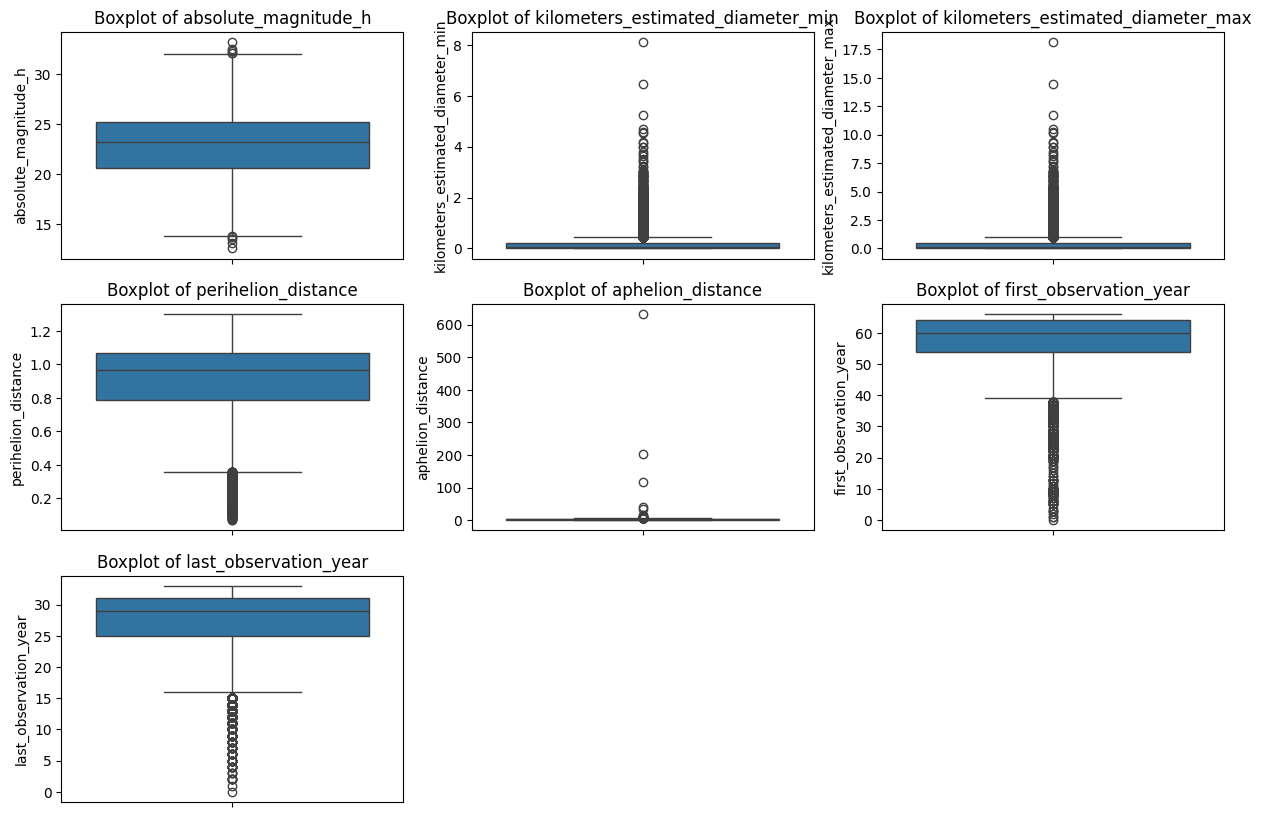

In [47]:
Figure, Axes = plt.subplots(ncols=3,nrows=3 ,figsize=(15, 10))

for idx, col in enumerate(numeric_col):
    sns.boxplot(data=df, y=col, ax=Axes[idx//3, idx%3])
    Axes[idx//3, idx%3].set_title(f'Boxplot of {col}')
# disable the empty subplot
for idx in range(len(numeric_col), 9):
    Axes[idx//3, idx%3].axis('off')

In [96]:
# tính số lượng giá trị ngoại lai cho từng biến
Q1 = df[numeric_col].quantile(0.25)
Q3 = df[numeric_col].quantile(0.75)
IQR = Q3 - Q1
outliers = (df[numeric_col] < (Q1 - 1.5 * IQR)) | (df[numeric_col] > (Q3 + 1.5 * IQR))
print(outliers.sum())

absolute_magnitude_h                   10
kilometers_estimated_diameter_min    2135
kilometers_estimated_diameter_max    2135
perihelion_distance                   576
aphelion_distance                      61
dtype: int64


nhận xét ngoài absoulte_magnitude_h có ít các giá trị ngoại lai , còn lại đều có nhiều giá trị ngoại lai

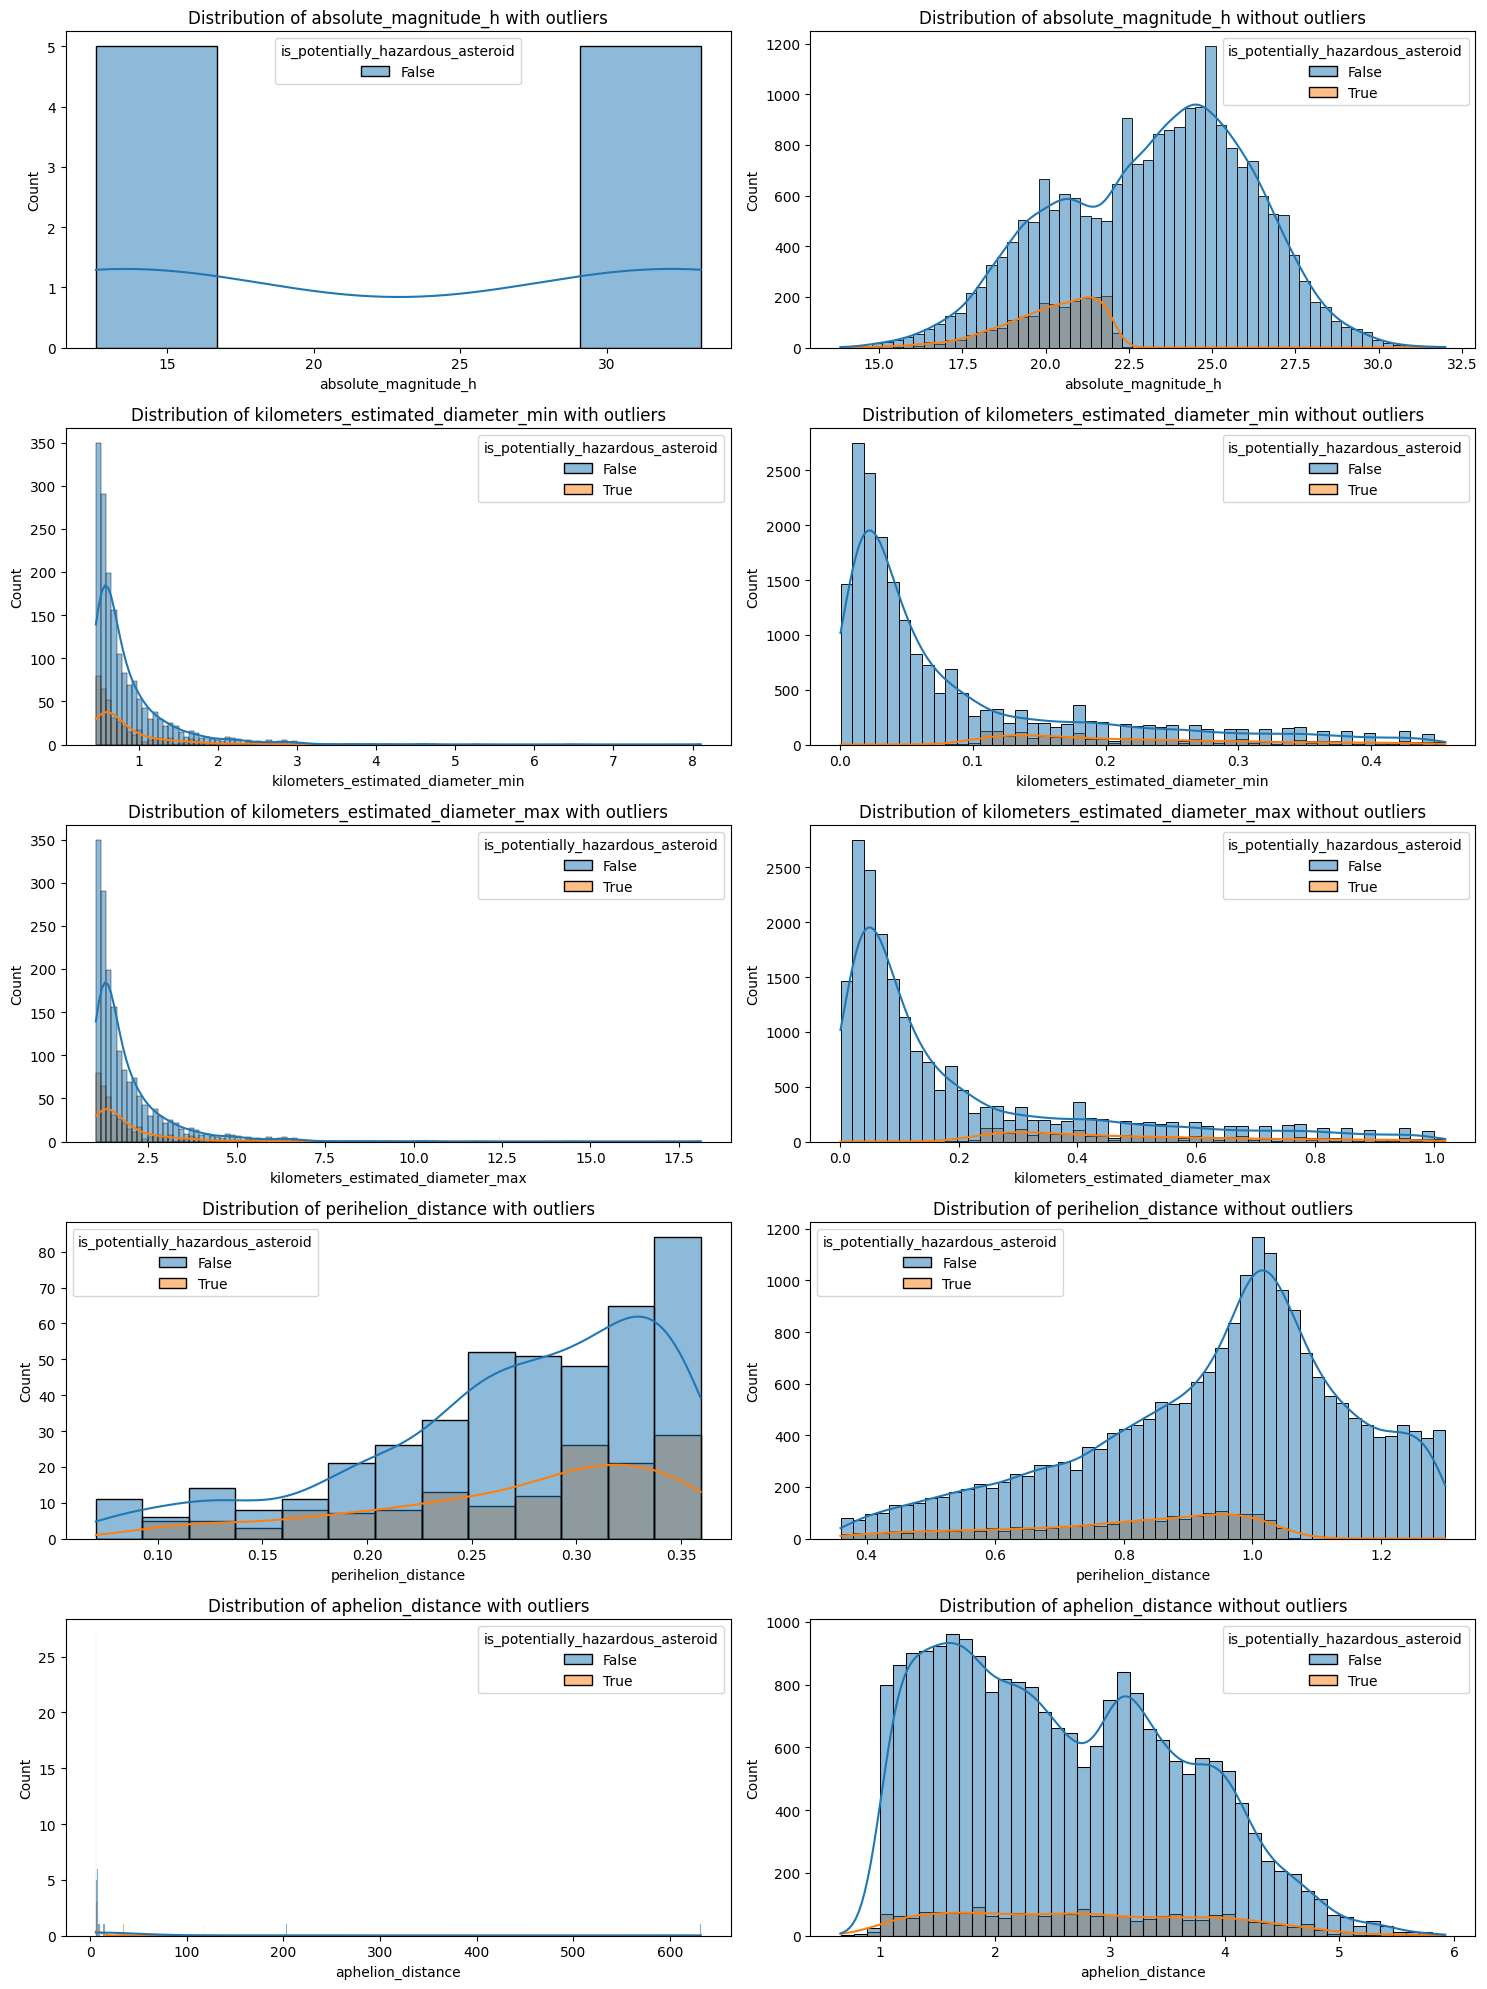

In [97]:
# phương án xử lí, vẽ hai đồ thị phân bố 1 cho các giá trị ngoại lai, và cái còn lại cho các giá trị không ngoại lai
Figure, Axes = plt.subplots(ncols=2, nrows=5, figsize=(15, 20))

for idx, col in enumerate(numeric_col):
    sns.histplot(data=df[outliers[col]], x=col, kde=True, ax=Axes[idx, 0],hue='is_potentially_hazardous_asteroid')
    Axes[idx, 0].set_title(f'Distribution of {col} with outliers')
    
    sns.histplot(data=df[~outliers[col]], x=col, kde=True, ax=Axes[idx, 1],hue='is_potentially_hazardous_asteroid')
    Axes[idx, 1].set_title(f'Distribution of {col} without outliers')
    

plt.tight_layout()
plt.show()

# phân tích cột absolute_magnitude_h

In [98]:
print('số lượng giá trị ngoại lai mà là vật thể tiềm ẩn nguy hiểm: ', df[outliers['absolute_magnitude_h'] & df['is_potentially_hazardous_asteroid']].shape[0])


số lượng giá trị ngoại lai mà là vật thể tiềm ẩn nguy hiểm:  0


dựa vào kết qua trên ta dễ dàng nhận thấy nếu các hàng là giá trị ngoại lại trong cột absolute_magnitude_h thì chúng có tỉ lệ 100% là các vật thể không nguy hiểm. Điều này có thể giúp chúng ta xác định được một số quy tắc để xác định vật thể có nguy cơ hay không dựa vào giá trị của cột này.

In [99]:
df.loc[(df['absolute_magnitude_h'] > 22.5) & (df['is_potentially_hazardous_asteroid'] == True)].count() 

id                                   0
absolute_magnitude_h                 0
is_potentially_hazardous_asteroid    0
is_sentry_object                     0
kilometers_estimated_diameter_min    0
kilometers_estimated_diameter_max    0
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
first_observation_date               0
last_observation_date                0
orbit_class_description              0
dtype: int64

Các vatah thể có độ sáng tuyệt đối lớn hơn 22.5 không có khả năng gây nguy hiểm cho trái đất

# Phân tích cột kilometer_estimated_diameter_min
* note : because kilometer_estimated_diameter_min and max have strong corr so my team just need analyse one col

In [102]:
# tính tỉ lệ các vật thể tiềm ẩn nguy hiểm khi cột kilometer_estimated_diameter_min là giá trị ngoại lai
hazardous_ratio = df.loc[outliers['kilometers_estimated_diameter_min'], 'is_potentially_hazardous_asteroid'].mean()
print(f"Tỉ lệ các vật thể tiềm ẩn nguy hiểm khi cột kilometer_estimated_diameter_min là giá trị ngoại lai: {hazardous_ratio:.2%}")

# tính tỉ lệ các vật thể tiềm ẩn nguy hiểm khi cột kilometer_estimated_diameter_min không phải là giá trị ngoại lai
hazardous_ratio = df.loc[~outliers['kilometers_estimated_diameter_min'], 'is_potentially_hazardous_asteroid'].mean()
print(f"Tỉ lệ các vật thể tiềm ẩn nguy hiểm khi cột kilometer_estimated_diameter_min không phải là giá trị ngoại lai: {hazardous_ratio:.2%}")

Tỉ lệ các vật thể tiềm ẩn nguy hiểm khi cột kilometer_estimated_diameter_min là giá trị ngoại lai: 18.22%
Tỉ lệ các vật thể tiềm ẩn nguy hiểm khi cột kilometer_estimated_diameter_min không phải là giá trị ngoại lai: 7.80%


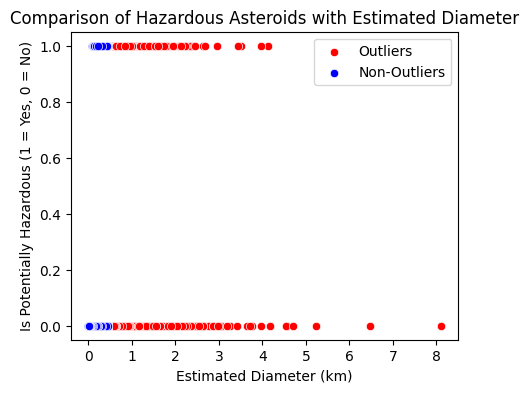

In [105]:
lower_bound = df['kilometers_estimated_diameter_min'].quantile(0.25) - 1.5 * IQR['kilometers_estimated_diameter_min']
upper_bound = df['kilometers_estimated_diameter_min'].quantile(0.75) + 1.5 * IQR['kilometers_estimated_diameter_min']
outliers = df[(df['kilometers_estimated_diameter_min'] < lower_bound) | 
              (df['kilometers_estimated_diameter_min'] > upper_bound)]
non_outliers = df[(df['kilometers_estimated_diameter_min'] >= lower_bound) & 
                  (df['kilometers_estimated_diameter_min'] <= upper_bound)]

# Vẽ scatter plot
plt.figure(figsize=(5, 4))
sns.scatterplot(data=outliers, 
                x='kilometers_estimated_diameter_min', 
                y='is_potentially_hazardous_asteroid', 
                label='Outliers', color='red')
sns.scatterplot(data=non_outliers, 
                x='kilometers_estimated_diameter_min', 
                y='is_potentially_hazardous_asteroid', 
                label='Non-Outliers', color='blue')

# Thêm tiêu đề và chú thích
plt.title("Comparison of Hazardous Asteroids with Estimated Diameter")
plt.xlabel("Estimated Diameter (km)")
plt.ylabel("Is Potentially Hazardous (1 = Yes, 0 = No)")
plt.legend()
plt.show()

In [48]:
df_is_hazardous = df[df['is_potentially_hazardous_asteroid'] == True]
df_non_hazardous = df[df['is_potentially_hazardous_asteroid'] == False]

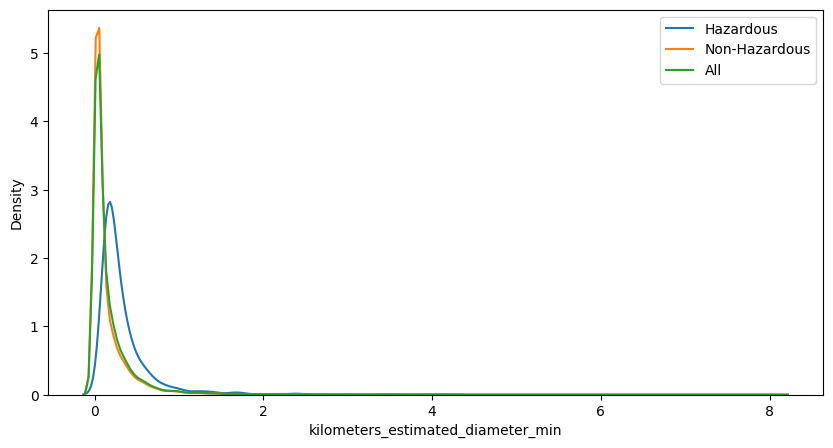

In [54]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_is_hazardous['kilometers_estimated_diameter_min'], label='Hazardous')
sns.kdeplot(data=df_non_hazardous['kilometers_estimated_diameter_min'], label='Non-Hazardous')
sns.kdeplot(data=df['kilometers_estimated_diameter_min'], label='All')
plt.legend()
plt.show()


đánh giá các vật thể tiềm ẩn nguy hiểm dựa trên đường kính ước lượng tối thiểu:
- Vật thể tiềm ẩn nguy hiểm có đường kính ước lượng tối thiểu trung bình lớn hơn so với các vật thể không tiềm ẩn nguy hiểm.

# Đối với 2 biến aphelion_distance và perihelion_distance, ta sẽ đánh giá có khả năng cắt và không có khả năng cắt

In [25]:
# create new col name is_collidable 
earth_aphelion =  1.0167103 
earth_perihelion = 0.9832899

delta = 0.0001943 

df['is_collidable'] = ((df['aphelion_distance'] >= (earth_perihelion - delta)) & 
					   (df['perihelion_distance'] <= (earth_aphelion + delta)))

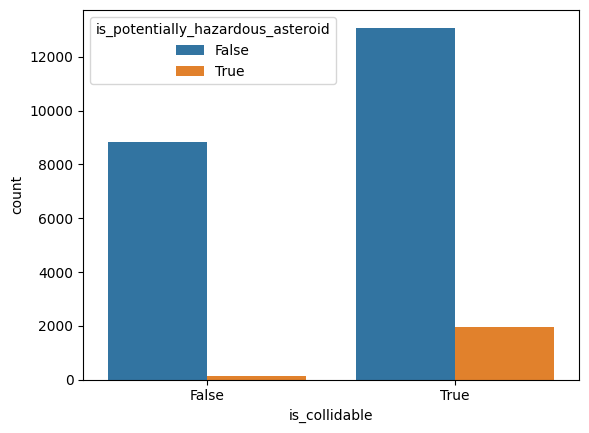

In [26]:
sns.countplot(data=df, x='is_collidable', hue='is_potentially_hazardous_asteroid')
plt.show()

đánh giá các vật thể có quỹ đạo không có khả năng cắt quỹ đạo trái đất vẫn có khả năng là vật thể nguy hiểm vì bị ảnh hưởng do lực hút trái đất hoặc do các yếu tố về quỹ đạo của vật thể

<Axes: xlabel='orbit_class_type', ylabel='count'>

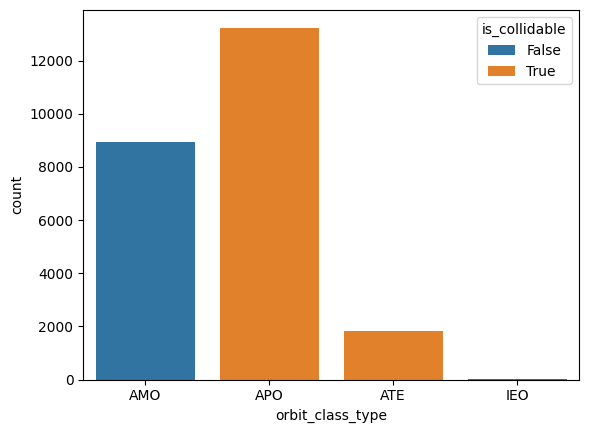

In [27]:
sns.countplot(data=df, x='orbit_class_type', hue='is_collidable')


In [28]:
df_is_collision = df[df['is_collidable'] == True] 
df_none_collision = df[df['is_collidable'] == False] 

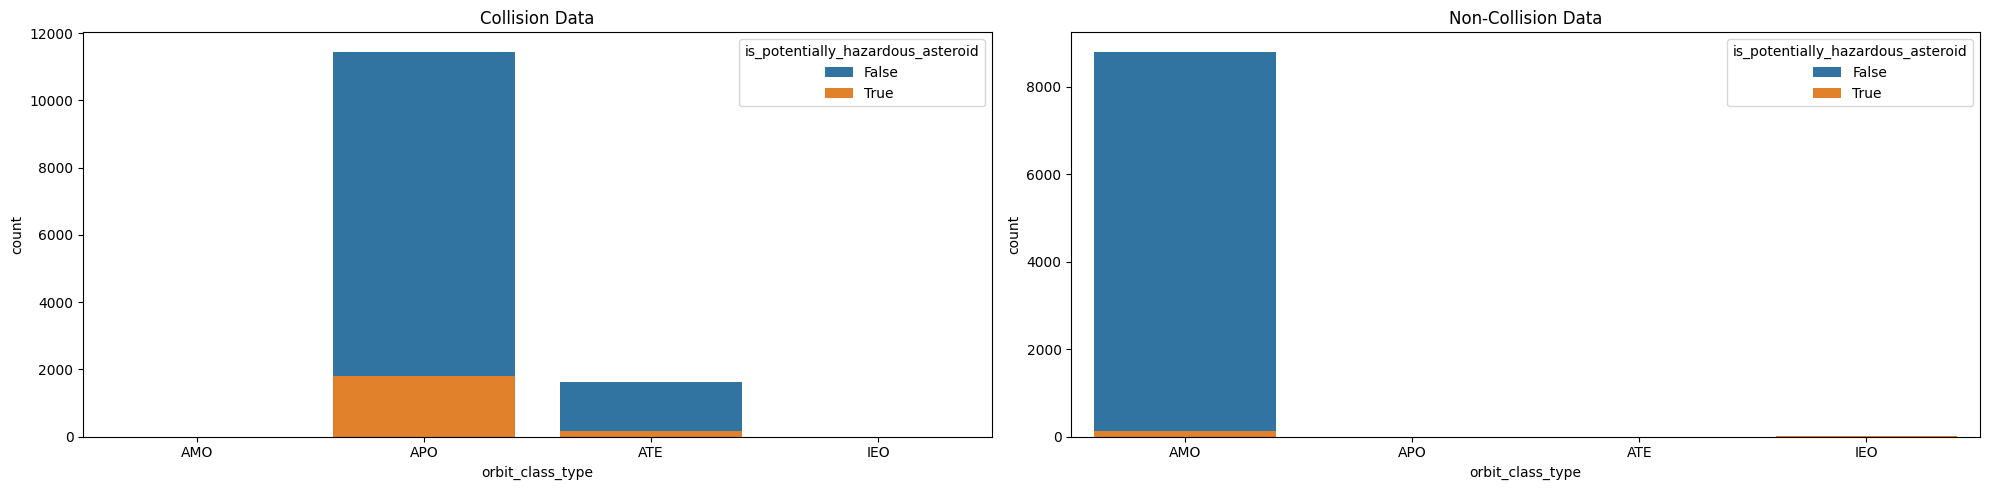

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot the first count plot
sns.countplot(data=df_is_collision, x='orbit_class_type', hue='is_potentially_hazardous_asteroid', ax=axes[0])
axes[0].set_title('Collision Data')

# Plot the second count plot
sns.countplot(data=df_none_collision, x='orbit_class_type', hue='is_potentially_hazardous_asteroid', ax=axes[1])
axes[1].set_title('Non-Collision Data')

# Show the plot
plt.tight_layout()
plt.show()


trong số các vật thể cắt quỹ đạo trái đất 
+ APO và ATE chiếm nhiều nhất.
+ Các vật thể APO chiếm tỉ lệ cao hơn so với các vật thể ATE.
+ Một vật thể mà có quỹ đạo cắt quỹ đạo trái đất có kiểu APO thì có khả năng đáng kể là vật thể nguy hiểm  

 đánh giá 
trong 126 vật thể có quỹ đạo không cắt quỹ đạo trái đất là tiềm ẩn nguy hiểm có:
- 2 vật thể loại quỹ đạo APO
- 118 vật thể loại quỹ đạo AMO
- 6 vật thể loại quỹ đạo IEO.


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id                                 23999 non-null  int64         
 1   absolute_magnitude_h               23999 non-null  float64       
 2   is_potentially_hazardous_asteroid  23999 non-null  bool          
 3   is_sentry_object                   23999 non-null  bool          
 4   kilometers_estimated_diameter_min  23999 non-null  float64       
 5   kilometers_estimated_diameter_max  23999 non-null  float64       
 6   orbit_class_type                   23999 non-null  category      
 7   perihelion_distance                23999 non-null  float64       
 8   aphelion_distance                  23999 non-null  float64       
 9   first_observation_date             23999 non-null  datetime64[ns]
 10  last_observation_date             

In [31]:
df.to_csv('../../data/NASA Near-Earth Objects-CleanbyThang.csv', index=False)